In [1]:
# libraries
import xarray as xr 
import matplotlib.pyplot as plt
import requests
from shapely.geometry import Polygon, MultiPolygon
import geopandas as gpd
import numpy as np
import fetch_borders

/Users/daniela/Documents/suyana/peru_produccion/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
gdf = fetch_borders.fetch_boundaries(continent="Americas", region="South America")


In [4]:

## load ports
file_path = "../data/puertos/processed/xr_ports.nc"
ds = xr.open_dataset(file_path)

port_names = ds['port'].values
latitudes = ds['latitude'].values
longitudes = ds['longitude'].values


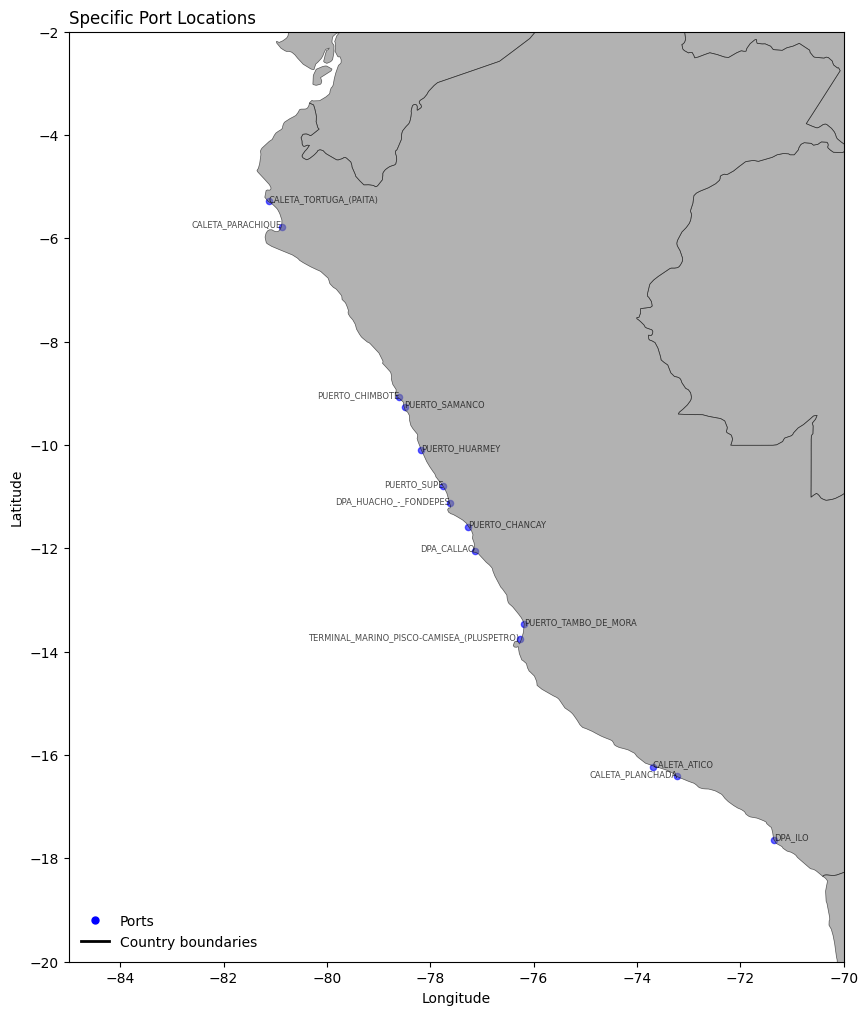

In [5]:
specific_ports = ['CALETA_PARACHIQUE', 'DPA_CALLAO', 'PUERTO_CHIMBOTE',
                  'PUERTO_HUARMEY', 'PUERTO_SAMANCO', 'DPA_HUACHO_-_FONDEPES',
                  'PUERTO_SUPE', 'PUERTO_TAMBO_DE_MORA',
                  'TERMINAL_MARINO_PISCO-CAMISEA_(PLUSPETRO)', 'DPA_ILO',
                  'CALETA_ATICO', 'CALETA_PLANCHADA', 'CALETA_TORTUGA_(PAITA)',
                  'PUERTO_CHANCAY']

mask = [port in specific_ports for port in port_names]
filtered_port_names = port_names[mask]
filtered_latitudes = latitudes[mask]
filtered_longitudes = longitudes[mask]

import matplotlib.lines as mlines

ports_legend = mlines.Line2D([], [], color='blue', marker='o', linestyle='None', markersize=5, label="Ports")
boundaries_legend = mlines.Line2D([], [], color='black', linestyle='-', linewidth=2, label="Country boundaries")

fig, ax = plt.subplots(figsize=(10, 15))
ax.scatter(filtered_longitudes, filtered_latitudes, s=20, c='b', marker='o', alpha=0.6, label="Ports")

for i, (name, lon, lat) in enumerate(zip(filtered_port_names, filtered_longitudes, filtered_latitudes)):
    ha = 'right' if i % 2 == 0 else 'left'  # Alternate alignment
    ax.text(lon, lat, name, fontsize=6, ha=ha, color='black', alpha=0.7)

gdf.plot(ax=ax, edgecolor="black", alpha=0.6, color="grey", linewidth=0.5)
ax.set_xlim(-85, -70)
ax.set_ylim(-20, -2)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title("Specific Port Locations", loc='left')
ax.legend(handles=[ports_legend, boundaries_legend], frameon=False, loc='lower left')
plt.show()

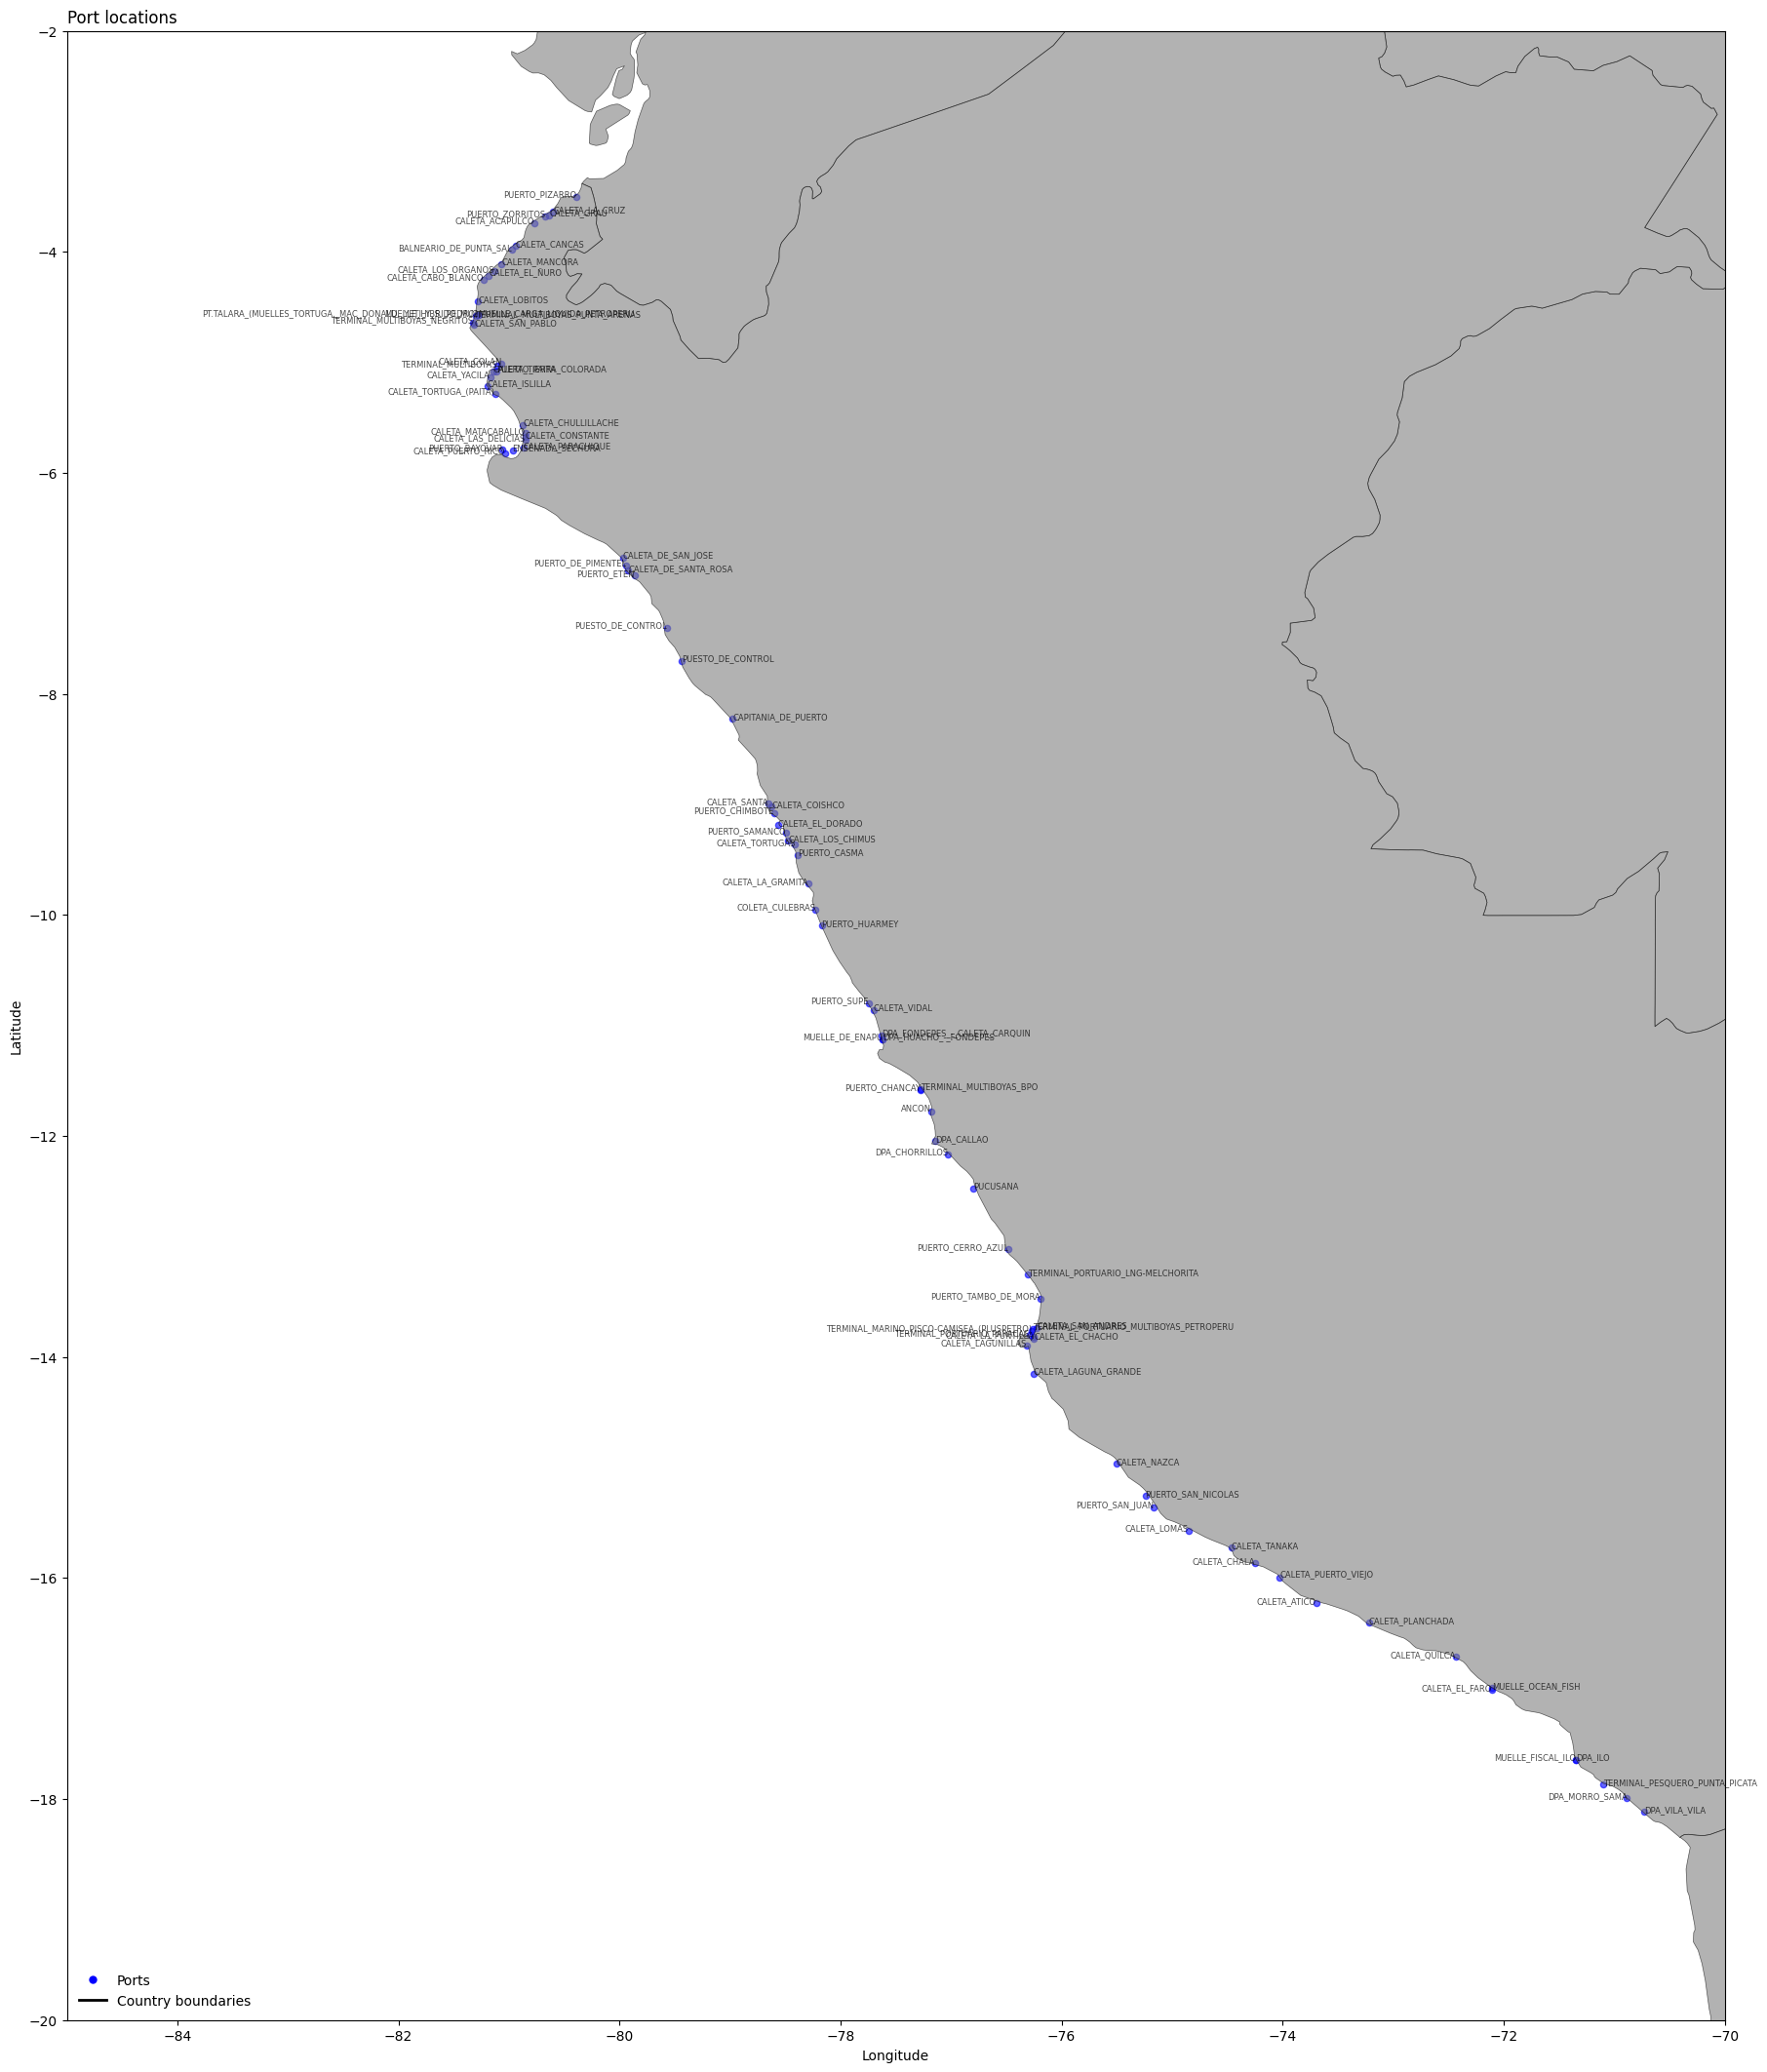

In [8]:

fig = plt.figure(figsize=(20, 30))
ax = plt.axes([0.05, 0.05, 0.85, 0.85])
ax.scatter(longitudes, latitudes, s=20, c='b', marker='o', alpha=0.6, label="Ports")

for i, (name, lon, lat) in enumerate(zip(port_names, longitudes, latitudes)):
    ha = 'right' if i % 2 == 0 else 'left'  # Alternate alignment
    ax.text(lon, lat, name, fontsize=6, ha=ha, color='black', alpha=0.7)

gdf.plot(ax=ax, edgecolor="black", alpha=0.6, color="grey", linewidth=0.5)
ax.set_xlim(-85, -70)
ax.set_ylim(-20, -2)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title("Port locations", loc='left')
ax.legend(handles=[ports_legend, boundaries_legend], frameon=False, loc='lower left')